In [1]:
import operator
import pandas as pd
import networkx as nx
from matplotlib.pyplot import figure

In [2]:
edges = pd.read_csv('UofT_edges.csv')

In [3]:
edges

,source,target,emt
0,983859.0,544485.0,503.807815
1,605618.0,362627.0,5157.568486
2,323189.0,118238.0,498.628481
3,919153.0,983859.0,401.962668
4,995748.0,983859.0,5095.458776
...,...,...,...
466228,743092.0,307628.0,2959.506391
466229,420266.0,489593.0,208.011081
466230,441447.0,877470.0,2221.199295
466231,444883.0,137297.0,1175.932049


In [4]:
nodes = pd.read_csv('UofT_nodes.csv')

In [5]:
nodes

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,Low,Low,low,Mark Stupar Lecy,Male,2305.0
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.571,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,Low,Low,low,Carolyn Washington Roberts,Female,418265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1939-01-16,1994-03-19,467.0,0,1,0.0,18945.108,10.0,32210.000,21.0,1186467.0,25.0,2550098.0,174.0,Low,High,high,Bret* Dove Gainey,Male,420884.0
999996,1970-12-13,1995-12-22,467.0,0,1,0.0,5775.601,7.0,5015.741,15.0,244504.0,53.0,417992.0,337.0,Low,Low,low,Anthony Ray Montano Gomez,Male,429418.0
999997,1958-09-09,2010-11-03,65.0,0,1,0.0,2351.255,2.0,15997.000,19.0,3024271.0,68.0,948981.0,124.0,Low,High,high,Bernadette Schofield Pace Mile,Female,731360.0
999998,1983-09-15,2013-01-30,231.0,0,1,0.0,27312.613,8.0,3399.000,5.0,943477.0,9.0,376429.0,12.0,Low,High,high,"Wasson, Russell Terrell",Male,837988.0


In [6]:
edges = edges.merge(nodes, left_on = 'source', right_on = 'CUSTOMER_ID', how = 'left')

In [7]:
edges = edges[['source', 'NAME', 'target', 'emt']]

In [8]:
edges

,source,NAME,target,emt
0,983859.0,Aisha Monarez Cole,544485.0,503.807815
1,605618.0,Peter Blevins Howard Howard,362627.0,5157.568486
2,323189.0,Steven Loose,118238.0,498.628481
3,919153.0,Carmen Briknley Felix Smith,983859.0,401.962668
4,995748.0,"Randall, Dora Gonzalez",983859.0,5095.458776
...,...,...,...,...
466228,743092.0,"Jarrell, Robert Gales Noyes",307628.0,2959.506391
466229,420266.0,Erica Elliot Hill,489593.0,208.011081
466230,441447.0,"Hill, Thomas Meekins RGroth",877470.0,2221.199295
466231,444883.0,Alma Burt Cushman Bruner,137297.0,1175.932049


In [9]:
edges = edges.merge(nodes, left_on = 'target', right_on = 'CUSTOMER_ID', how = 'left')

In [10]:
edges

,source,NAME_x,target,emt,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,...,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME_y,GENDER,CUSTOMER_ID
0,983859.0,Aisha Monarez Cole,544485.0,503.807815,1956-11-30,2016-09-16,92.0,1,1,0.0,...,4934588.0,46.0,2297452.0,128.0,Low,Low,high,Sara Lowe White Voss,Female,544485.0
1,605618.0,Peter Blevins Howard Howard,362627.0,5157.568486,1939-02-11,1984-01-31,89.0,1,1,0.0,...,11865009.0,22.0,5298924.0,88.0,Low,Low,medium,Julianna Duncan,Female,362627.0
2,323189.0,Steven Loose,118238.0,498.628481,1977-09-22,2006-11-28,79.0,1,1,0.0,...,7332435.0,252.0,3822151.0,605.0,Low,Low,high,Fred CRUZ,Male,118238.0
3,919153.0,Carmen Briknley Felix Smith,983859.0,401.962668,1983-07-04,2022-04-06,724.0,1,1,0.0,...,1254396.0,77.0,379613.0,183.0,Low,Low,high,Aisha Monarez Cole,Female,983859.0
4,995748.0,"Randall, Dora Gonzalez",983859.0,5095.458776,1983-07-04,2022-04-06,724.0,1,1,0.0,...,1254396.0,77.0,379613.0,183.0,Low,Low,high,Aisha Monarez Cole,Female,983859.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466228,743092.0,"Jarrell, Robert Gales Noyes",307628.0,2959.506391,1999-01-22,2016-08-08,157.0,1,1,0.0,...,51461.0,11.0,33941.0,31.0,Low,Low,low,Carole Wolfe Cotney iWnkles,Female,307628.0
466229,420266.0,Erica Elliot Hill,489593.0,208.011081,1979-04-27,1998-09-08,630.0,1,1,0.0,...,2608648.0,169.0,3057852.0,548.0,Low,Low,medium,"Romeo, Lou s Gomez Hiltz",Male,489593.0
466230,441447.0,"Hill, Thomas Meekins RGroth",877470.0,2221.199295,1996-07-03,2006-08-07,185.0,1,1,0.0,...,125896.0,25.0,83916.0,40.0,Low,Low,low,"Anderson, David Trytten Meier",Male,877470.0
466231,444883.0,Alma Burt Cushman Bruner,137297.0,1175.932049,2003-12-07,2006-11-15,79.0,1,1,0.0,...,331709.0,225.0,286145.0,327.0,Low,Low,low,kittie Davis,Female,137297.0


In [11]:
df = edges[['source', 'NAME_x', 'target', 'NAME_y', 'emt']]

In [12]:
df

,source,NAME_x,target,NAME_y,emt
0,983859.0,Aisha Monarez Cole,544485.0,Sara Lowe White Voss,503.807815
1,605618.0,Peter Blevins Howard Howard,362627.0,Julianna Duncan,5157.568486
2,323189.0,Steven Loose,118238.0,Fred CRUZ,498.628481
3,919153.0,Carmen Briknley Felix Smith,983859.0,Aisha Monarez Cole,401.962668
4,995748.0,"Randall, Dora Gonzalez",983859.0,Aisha Monarez Cole,5095.458776
...,...,...,...,...,...
466228,743092.0,"Jarrell, Robert Gales Noyes",307628.0,Carole Wolfe Cotney iWnkles,2959.506391
466229,420266.0,Erica Elliot Hill,489593.0,"Romeo, Lou s Gomez Hiltz",208.011081
466230,441447.0,"Hill, Thomas Meekins RGroth",877470.0,"Anderson, David Trytten Meier",2221.199295
466231,444883.0,Alma Burt Cushman Bruner,137297.0,kittie Davis,1175.932049


In [16]:
df.columns = ["source", "source_name", "target", "target_name", "emt"]

In [17]:
df

,source,source_name,target,target_name,emt
0,983859.0,Aisha Monarez Cole,544485.0,Sara Lowe White Voss,503.807815
1,605618.0,Peter Blevins Howard Howard,362627.0,Julianna Duncan,5157.568486
2,323189.0,Steven Loose,118238.0,Fred CRUZ,498.628481
3,919153.0,Carmen Briknley Felix Smith,983859.0,Aisha Monarez Cole,401.962668
4,995748.0,"Randall, Dora Gonzalez",983859.0,Aisha Monarez Cole,5095.458776
...,...,...,...,...,...
466228,743092.0,"Jarrell, Robert Gales Noyes",307628.0,Carole Wolfe Cotney iWnkles,2959.506391
466229,420266.0,Erica Elliot Hill,489593.0,"Romeo, Lou s Gomez Hiltz",208.011081
466230,441447.0,"Hill, Thomas Meekins RGroth",877470.0,"Anderson, David Trytten Meier",2221.199295
466231,444883.0,Alma Burt Cushman Bruner,137297.0,kittie Davis,1175.932049


In [31]:
df['target_name'].value_counts()

Kevin Jackson                    15
Joseph Kinard                    15
Robert Brahler Brown             15
Robinson, Ryan Ecn               14
Hunter Blatt Meadows Ransler     13
                                 ..
Benjamin Vazquez Gomez Duenas     1
Jimmie Lpoez Sansotta             1
Leaks, Clayton Cr Phipps          1
Edna Grimes Cossette Hartis       1
kittie Davis                      1
Name: target_name, Length: 240845, dtype: int64

In [18]:
G = nx.from_pandas_edgelist(df, "source_name", "target_name", create_using = nx.DiGraph(), edge_attr = "emt")

In [52]:
nodes_interest = list(df[df.target_name == "Kevin Jackson"].source_name.head(10)) + ["Kevin Jackson"]

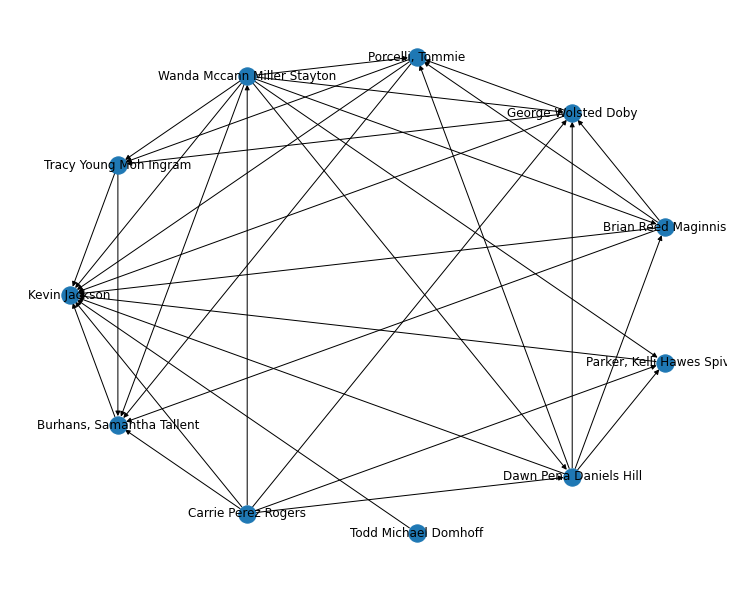

In [53]:
figure(figsize=(10, 8))
nx.draw_shell(G.subgraph(nodes = nodes_interest), with_labels = True)

In [54]:
nodes_interest_1 = list(df[df.target_name == "Joseph Kinard"].source_name.head(10)) + ["Joseph Kinard"]

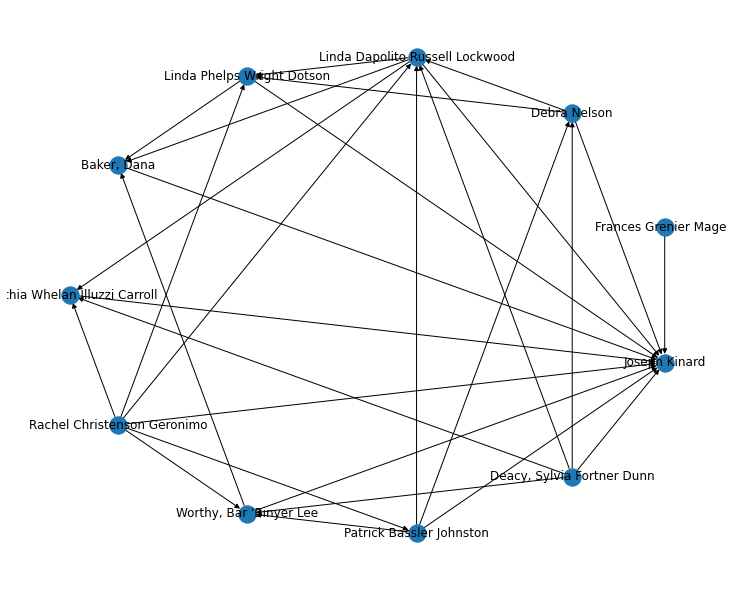

In [55]:
figure(figsize=(10, 8))
nx.draw_shell(G.subgraph(nodes = nodes_interest_1), with_labels = True)

In [56]:
nodes_interest_2 = list(df[df.target_name == "Robert Brahler Brown"].source_name.head(10)) + ["Robert Brahler Brown"]

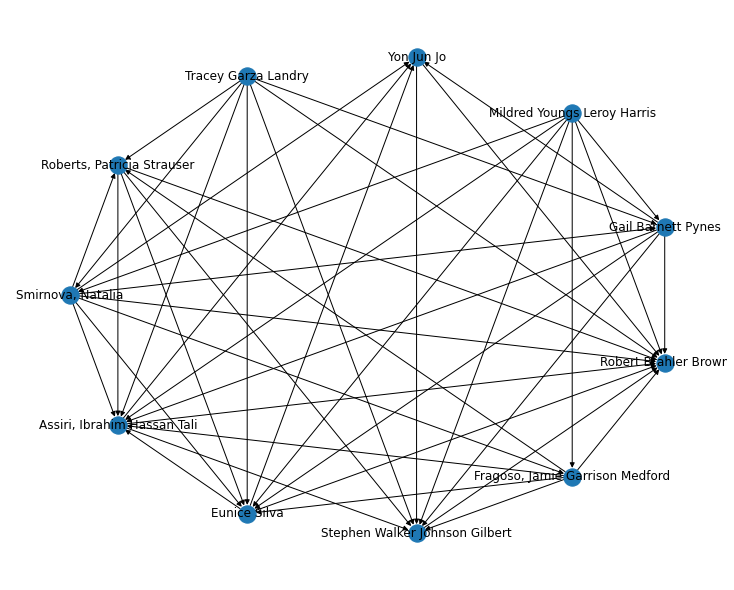

In [57]:
figure(figsize=(10, 8))
nx.draw_shell(G.subgraph(nodes = nodes_interest_2), with_labels = True)

In [70]:
nodes_interest_3 = list(df[df.target_name == "Leaks, Clayton Cr Phipps"].source_name.head(10)) + ["Leaks, Clayton Cr Phipps"]

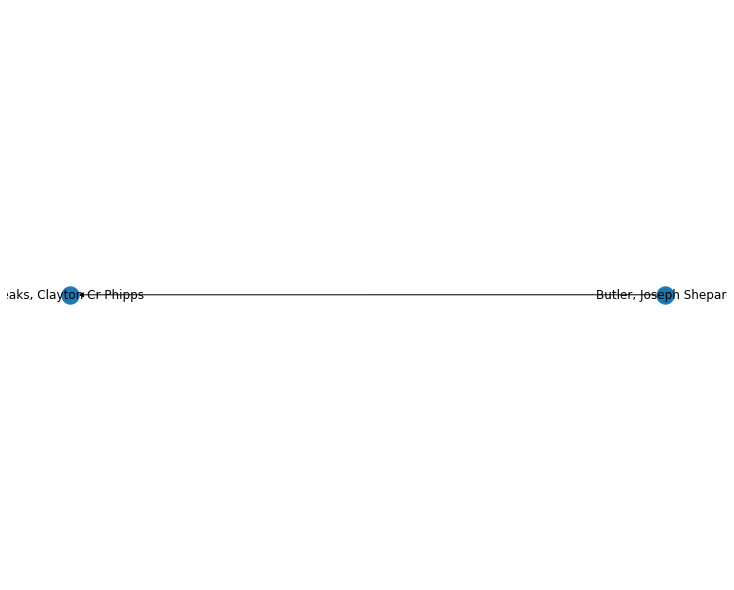

In [71]:
figure(figsize=(10, 8))
nx.draw_shell(G.subgraph(nodes = nodes_interest_3), with_labels = True)